In [1]:
from sklearn.datasets import load_digits
from sklearn.decomposition import KernelPCA
import matplotlib.pyplot as plt 
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import metrics

#loading dataset
digits = load_digits()

print(digits.data.shape)
print(digits.target.shape)

(1797, 64)
(1797,)


In [2]:
print(digits.data)
print(digits.target)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]


Accuracy: 0.8888888888888888

ORIGINAL IMAGES BEFORE REDUCTION:


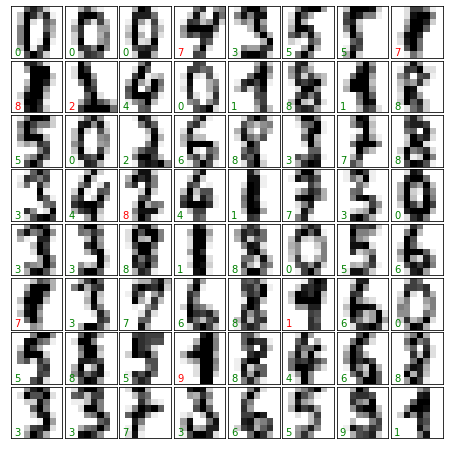

In [3]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

clf = GaussianNB()
clf.fit(X_train, y_train)

predicted = clf.predict(X_test)
expected = y_test

fig = plt.figure(figsize=(6, 6))  
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
print("Accuracy:",metrics.accuracy_score(expected, predicted))
print("\nORIGINAL IMAGES BEFORE REDUCTION:")

for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test.reshape(-1, 8, 8)[i], cmap=plt.cm.binary,
              interpolation='nearest')

    if predicted[i] == expected[i]:
        ax.text(0, 7, str(predicted[i]), color='green')
    else:
        ax.text(0, 7, str(predicted[i]), color='red')

In [4]:
transformer = KernelPCA(n_components=24)
X_transformed = transformer.fit_transform(digits.data)

print(X_transformed.shape)

(1797, 24)


Accuracy: 0.9311111111111111

KERNEL PCA REDUCED IMAGES:


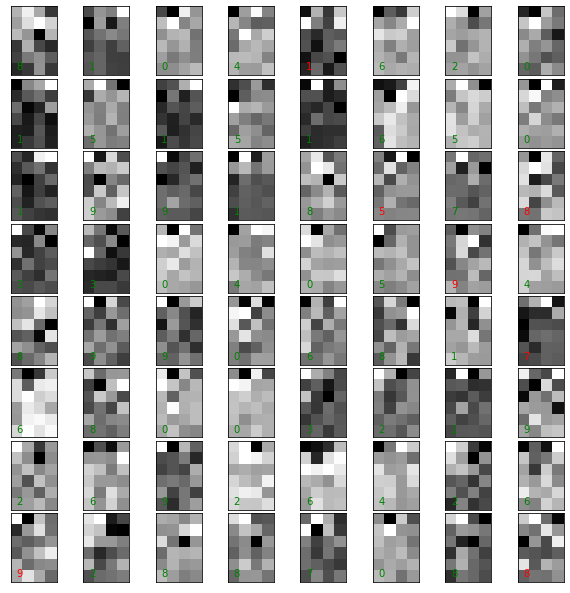

In [5]:
#Model fitting and calculating accuracy after reducing dimensions

X_train, X_test, y_train, y_test = train_test_split(X_transformed, digits.target)

clf = GaussianNB()
clf.fit(X_train, y_train)

predicted = clf.predict(X_test)
expected = y_test

fig = plt.figure(figsize=(8, 8))  
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
print("Accuracy:",metrics.accuracy_score(expected, predicted))
print("\nKERNEL PCA REDUCED IMAGES:")

for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test.reshape(-1, 6,4 )[i], cmap=plt.cm.binary,
              interpolation='nearest')

    if predicted[i] == expected[i]:
        ax.text(0, 5, str(predicted[i]), color='green')
    else:
        ax.text(0, 5, str(predicted[i]), color='red')